# 4.4 連続型確率分布

In [2]:
using Distributions
using PyPlot

In [3]:
function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
    return
end

set_options (generic function with 1 method)

## 4.4.6 ディリクレ分布

In [4]:
# ディリクレ分布の作成
α = [0.75, 0.75, 0.75]
d = Dirichlet(α)

Dirichlet{Float64, Vector{Float64}, Float64}(alpha=[0.75, 0.75, 0.75])

In [5]:
# サンプリング
X = rand(d, 1000)
X

3×1000 Matrix{Float64}:
 0.0751122  0.11781    0.0298848  …  0.19691    0.0656515  0.179021
 0.385415   0.0319335  0.289921      0.792099   0.152435   0.25859
 0.539473   0.850257   0.680194      0.0109906  0.781914   0.562388

In [6]:
pdf(d, [0.1, 0.4, 0.5])

1.6372771897737735

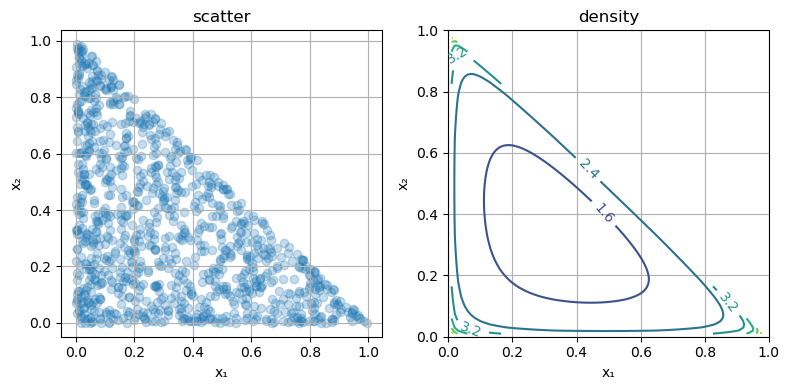

In [7]:
fig, axes = subplots(1, 2, figsize=(8, 4))

# 散布図による可視化
axes[1].scatter(X[1,:], X[2,:], alpha=0.25)
set_options(axes[1], "x₁", "x₂", "scatter")

# 確率密度関数の可視化
x₁s = range(0, 1, length=100)
x₂s = range(0, 1, length=100)
cs = axes[2].contour(x₁s, x₂s, [x₁ + x₂ > 1 ? 0.0 : pdf(d, [x₁, x₂, 1 - (x₁ + x₂)]) for x₁ in x₁s, x₂ in x₂s]')
axes[2].clabel(cs, inline=true)
set_options(axes[2], "x₁", "x₂", "density")

tight_layout()

In [8]:
mean(d)

3-element Vector{Float64}:
 0.3333333333333333
 0.3333333333333333
 0.3333333333333333

In [11]:
mean(X, dims=2)

3×1 Matrix{Float64}:
 0.32116056125709647
 0.33541289364816684
 0.3434265450947362

In [9]:
cov(d)

3×3 Matrix{Float64}:
  0.0683761  -0.034188   -0.034188
 -0.034188    0.0683761  -0.034188
 -0.034188   -0.034188    0.0683761

In [12]:
cov(X, dims=2)

3×3 Matrix{Float64}:
  0.0681572  -0.0346005  -0.0335567
 -0.0346005   0.0704796  -0.0358791
 -0.0335567  -0.0358791   0.0694358

[0.1, 0.1, 0.1][0.5, 0.5, 0.5][1.0, 1.0, 1.0][2.0, 2.0, 2.0][5.0, 5.0, 5.0][0.1, 0.1, 0.5][0.1, 0.5, 1.0][0.1, 0.5, 5.0][1.0, 2.0, 5.0]

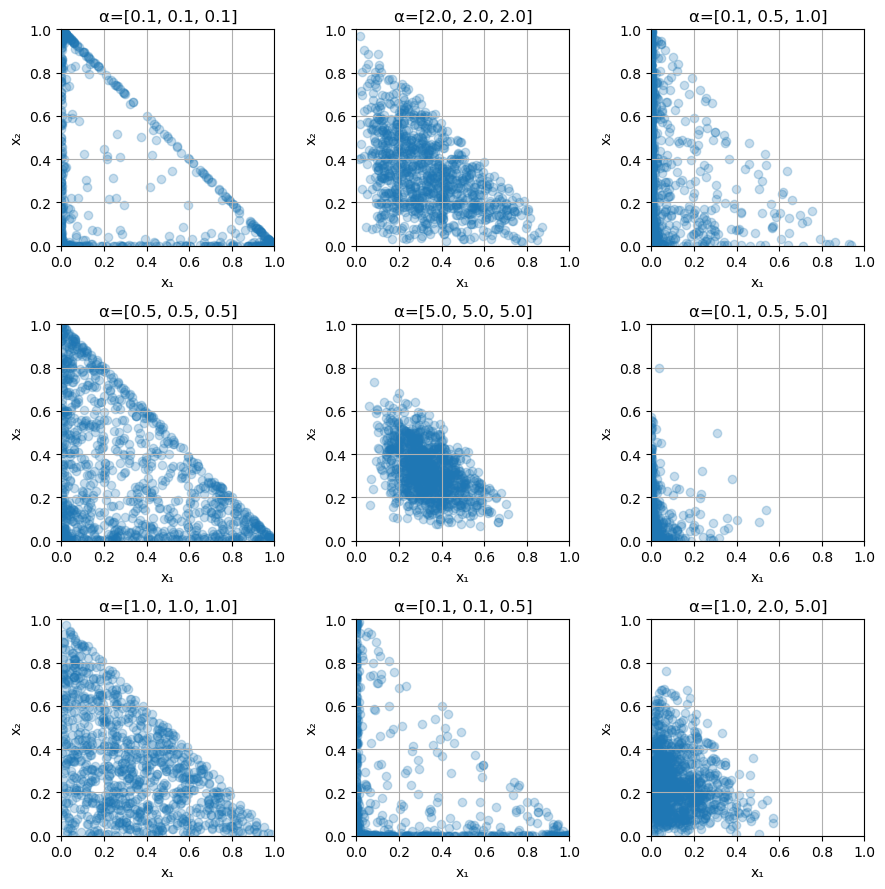

In [13]:
# パラメータのリスト
αs = [[0.1, 0.1, 0.1],
      [0.5, 0.5, 0.5],
      [1.0, 1.0, 1.0],
      [2.0, 2.0, 2.0],
      [5.0, 5.0, 5.0],
      [0.1, 0.1, 0.5],
      [0.1, 0.5, 1.0],
      [0.1, 0.5, 5.0],
      [1.0, 2.0, 5.0],
     ]

xs = range(0.01, 0.99, length=100)
ys = range(0.01, 0.99, length=100)

fig, axes = subplots(3, 3, figsize=(9,9))

for (i, α) in enumerate(αs)
    print(α)
    d = Dirichlet(α)
    X = rand(d, 1000)
    axes[i].scatter(X[1,:], X[2,:], alpha=0.25)
    axes[i].set_xlim([0,1])
    axes[i].set_ylim([0,1])
    set_options(axes[i], "x₁", "x₂", "α=$(α)")
end
tight_layout()